In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Reading data

data = pd.read_csv('/Users/siddharthsmac/Downloads/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# collecting x and y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [6]:
# mean x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# total number of values
m = len(x)

# using the formula to calculate b1 and b0

numer = 0
denom = 0

for i in range(m):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
    
b1 = numer/denom

b0 = mean_y-(b1*mean_x)

# print coefficients

print(b1,b0)

0.26342933948939945 325.57342104944223


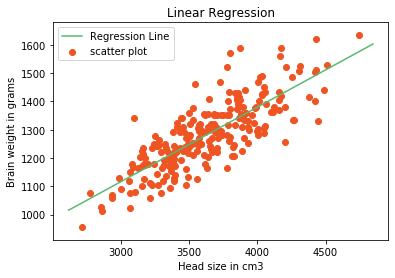

In [7]:
# plotting values and regression line
max_x = np.max(x)+100
min_x = np.min(x)-100

# Calculating line values X and Y
X = np.linspace(min_x,max_x,1000)
Y = b0 + b1*X

# Plotting line
plt.plot(X,Y,color='#58b970',label='Regression Line')

# plotting scatter points
plt.scatter(x,y,c='#ef5423',label='scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.title('Linear Regression')

plt.legend()
plt.show()

In [27]:
ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1*x[i]

ss_t += (y[i]-mean_y)**2
ss_r += (y[i]-y_pred)**2

r2 = 1 - (ss_r/ss_t)
print(r2)

[0.63156481]


In [28]:
#Linear Regression using scikit

from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error
#cannot use rank 1 matrix in scikit learn
x = x.reshape((m,1))

#creating model
reg = LinearRegression()

#fitting training data
reg = reg.fit(x,y)

#y prediction
y_pred = reg.predict(x)

#calculating R2 score
r2_score = reg.score(x,y)
print(r2_score)

0.639311719957
